# Project 1  Anna copied original from Charles

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
aug_sep = pd.read_csv("Simmer_AugSep19.csv", low_memory=False)
oct_nov = pd.read_csv("Simmer_OctNov19.csv", low_memory=False)
dec_jan = pd.read_csv("Simmer_DecJan19.csv", low_memory=False)
feb_mar = pd.read_csv("Simmer_FebMar20.csv", low_memory=False)
people = pd.read_csv("People_Sample.csv", low_memory=False)

# Data Cleaning

Define a function that filters out columns that contains percentage of Nan values above a certain threshold.

In [3]:
def filter_nan(df, threshold):
    length = len(df)
    result = pd.DataFrame()
    for col in df.columns:
        if (df[col].isnull().sum() < length * threshold):
            result[col] = df[col]
    return result

In [4]:
filtered_aug_sep = filter_nan(aug_sep, 0.5)
filtered_oct_nov = filter_nan(oct_nov, 0.5)
filtered_dec_jan = filter_nan(dec_jan, 0.5)
filtered_feb_mar = filter_nan(feb_mar, 0.5)

In [5]:
useful_features_people = ['distinct_id', 
                   'properties.$ae_total_app_session_length', 
                   'properties.Name',
                   'properties.$region',
                   'properties.$country_code',
                   'properties.$city',
                   'properties.AuthProvider',
                   'properties.$ae_total_app_sessions',
                   'properties.$timezone',
                   'properties.$last_seen',
                   'properties.$ios_app_version',
                   'properties.$ios_version',
                   'properties.$ios_device_model',
                   'properties.$ios_lib_version',
                   'properties.$ae_first_app_open_date'
                  ]

In [6]:
def clean_people(people_data, features):
    people_data = filter_nan(people_data, 0.5)
    people_data = people_data.loc[:, features]
    people_data.rename(columns=lambda x: re.sub('properties.|\$','',x), inplace=True)
    people_data.rename(columns={'Name' : 'name', 'AuthProvider' : 'auth_provider'}, inplace=True)
    people_data['name'].fillna('Unknown', inplace=True)
    people_data['city'].fillna('Unknown', inplace=True)
    people_data['region'].fillna('Unknown', inplace=True)
    people_data['auth_provider'].fillna('Unknown', inplace=True)
    people_data['ae_first_app_open_date'] = pd.to_datetime(people_data['ae_first_app_open_date'])
    people_data['last_seen'] = pd.to_datetime(people_data['last_seen'])
    #add a column for time between first and last session
    people_data['active_timespan'] = people_data['last_seen'] - people_data['ae_first_app_open_date']
    people_data['average_session_time'] = people_data['ae_total_app_session_length']/people_data['ae_total_app_sessions']
    return people_data

In [7]:
people_cleaned = clean_people(people, useful_features_people)
people_cleaned

,distinct_id,ae_total_app_session_length,name,region,country_code,city,auth_provider,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,2.5.0,13.2.3,"iPhone9,3",3.4.9,NaT,NaT,196.544059
1,E2D9AB63-1718-4D1E-936F-10BE1D889989,4412,Theodore Wu,California,US,Burbank,Google,59,America/Los_Angeles,2019-09-08 03:15:47+00:00,2.0.5,13.1,"iPhone9,1",3.4.4,2019-04-22 20:34:46+00:00,138 days 06:41:01,74.779661
2,vaibhavverma9@gmail.com_56,71430,Vaibhav Verma,Gujarat,IN,Ahmedabad,Foodie,621,Asia/Kolkata,2019-04-15 15:18:25+00:00,1.3.7,12.2,"iPhone7,1",3.3.3,NaT,NaT,115.024155
3,0C954A3F-0AB6-4D12-B4E9-D916C95B0C6E,12836,Tiffany Qi,California,US,San Francisco,Facebook,77,America/Los_Angeles,2019-11-09 18:33:06+00:00,2.1.6,13.1.3,"iPhone9,3",3.4.4,2019-05-01 06:57:08+00:00,192 days 11:35:58,166.701299
4,addidas23@gmail.com_139,2066,Nathan Nangia,Illinois,US,Chicago,Foodie,39,America/Chicago,2020-03-18 15:09:21+00:00,2.5.4,13.4,"iPhone11,2",3.4.9,NaT,NaT,52.974359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,52774481-EECA-4703-8F31-F634B24773BE,161801,Reyna Huang,Virginia,US,Falls Church,Facebook,1168,America/New_York,2020-02-23 00:59:33+00:00,2.4.7,13.3.1,"iPhone12,1",3.4.4,2019-02-08 14:15:24+00:00,379 days 10:44:09,138.528253
177,F4B6EE31-E835-4C5D-8387-456DFF4E9A3D,8308,Christine Duke,Illinois,US,Unknown,Unknown,53,America/Chicago,2020-03-21 16:43:15+00:00,2.5.0,13.3.1,"iPhone12,3",3.4.9,2018-12-03 21:10:02+00:00,473 days 19:33:13,156.754717
178,04ADA4C3-9212-49DA-B600-67A8403D69C3,2283,Alexandria Ma,Illinois,US,Chicago,Unknown,45,America/Chicago,2020-01-19 01:41:22+00:00,2.3.3,13.2,"iPhone11,8",3.4.4,2019-06-11 14:14:02+00:00,221 days 11:27:20,50.733333
179,619EECB8-EA49-493B-9048-4EAB912BF98E,4227,Lucy Li,Illinois,US,Chicago,Facebook,67,America/Chicago,2019-12-12 03:35:49+00:00,2.3.3,13.2,"iPhone12,3",3.4.4,2019-05-23 13:42:40+00:00,202 days 13:53:09,63.089552


In [8]:
useful_features_event = ['name',
 'distinct_id',
 'time',
 'properties.$ae_session_length',
 'properties.$city',
 'properties.$region',
 'properties.mp_country_code',
 'properties.locationSetting',
 'properties.notificationSettings',
 'properties.FirstTimeUploaded',
 'properties.$had_persisted_distinct_id',
 'properties.Signup With',
 'properties.imageAdded',
 'properties.commentAdded',
 'properties.commentLength',
 'properties.ImageUploaded']

In [9]:
def clean_event(event_data, features):
    event_data = event_data.loc[:, features]
    event_data.rename(columns=lambda x: re.sub('properties.|\$','',x), inplace=True)
    return event_data

In [10]:
aug_sep_cleaned = clean_event(aug_sep, useful_features_event)
oct_nov_cleaned = clean_event(oct_nov, useful_features_event)
dec_jan_cleaned = clean_event(dec_jan, useful_features_event)
feb_mar_cleaned = clean_event(feb_mar, useful_features_event)
past_7_months = aug_sep_cleaned.append(oct_nov_cleaned).append(dec_jan_cleaned).append(feb_mar_cleaned)
past_7_months.reset_index(drop=True)

,name,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,$ae_updated,4A47A27E-992F-40D8-8A7E-08CA601D441A,1565013412000,NaN,Columbus,Ohio,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,AppOpen,4A47A27E-992F-40D8-8A7E-08CA601D441A,1565013413000,NaN,Lake Zurich,Illinois,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,AppOpen,866F0631-15CB-40CD-8E0A-04753AFFB01A,1565145944000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
3,Visit Signup/Login Page,866F0631-15CB-40CD-8E0A-04753AFFB01A,1565145948000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,$ae_first_open,12C9B87A-53B0-4283-9083-40AE9F8AB95A,1565522925000,NaN,Niles,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190366,Visit Home Page,nb@gmail.com_93,1585287738000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
190367,Visit Home Page,nb@gmail.com_93,1585291727000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
190368,Visit Home Page,nb@gmail.com_93,1585292224000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
190369,Visit Home Page,nb@gmail.com_93,1585293994000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


In [11]:
merged = people_cleaned.merge(past_7_months, how='left', on='distinct_id')
merged.columns

Index(['distinct_id', 'ae_total_app_session_length', 'name_x', 'region_x',
       'country_code', 'city_x', 'auth_provider', 'ae_total_app_sessions',
       'timezone', 'last_seen', 'ios_app_version', 'ios_version',
       'ios_device_model', 'ios_lib_version', 'ae_first_app_open_date',
       'active_timespan', 'average_session_time', 'name_y', 'time',
       'ae_session_length', 'city_y', 'region_y', 'mp_country_code',
       'locationSetting', 'notificationSettings', 'FirstTimeUploaded',
       'had_persisted_distinct_id', 'Signup With', 'imageAdded',
       'commentAdded', 'commentLength', 'ImageUploaded'],
      dtype='object')

In [12]:
past_7_months['Signup With'].value_counts()
merged['Signup With'].value_counts()
merged['Signup With'].value_counts()

Foodie      29
Facebook    13
Google       9
Name: Signup With, dtype: int64

# Fill In Signup With Column

In [13]:
def addsignup(tbl):
    
    sign_dict = {}
    sign_array = ['Foodie', 'Facebook', 'Google']
    for index, row in tbl.iterrows():
        if tbl.at[index, 'Signup With'] in sign_array:
            sign_dict[tbl.at[index, 'distinct_id']] = tbl.at[index, 'Signup With']
    print(sign_dict)
            
    for index, row in tbl.iterrows():
        if tbl.at[index, 'distinct_id']:
            dis_ID = tbl.at[index, 'distinct_id']
            if dis_ID in sign_dict.keys():
                tbl.at[index, 'Signup With'] = sign_dict.get(dis_ID)
    return tbl

cleaned_signup = addsignup(merged)
cleaned_signup

{'582FE9F6-5A27-4FC0-8F7D-CCEA4AE76AF8': 'Facebook', '7466E480-A994-4CFC-BAFD-C9B96841A8A3': 'Foodie', '4749ABC7-01BD-4E5E-A957-D22EDDBCD76A': 'Google', '78D35D7D-A097-468F-AEF3-F93921366BD3': 'Foodie', '27968824-675F-4995-979B-44776827567C': 'Facebook', 'D3264EA1-91F5-4AB1-824C-39BC50BEA979': 'Foodie', '3059A451-3178-4602-84FF-AAD5E8607CAF': 'Foodie', '09353F2A-56B0-4BF8-B532-C8B9B25BCC80': 'Facebook', '629987EB-EE9B-4162-A12B-20152B9F57E4': 'Google', '69A409B6-41AE-4B48-A862-E3505A63ED18': 'Foodie', 'B2DD3857-E455-4A0C-BA52-75BD79228B0B': 'Foodie', '8375E983-1377-4817-9B28-0D7BC042472D': 'Foodie', '6B6F3027-5AD3-49B3-B0F3-733EE1759217': 'Google', 'FE4D7209-BC02-466C-A293-AC822D08BEB4': 'Facebook', 'B395D3FC-B576-4091-B0C6-E820445551C2': 'Foodie', 'A5E08D96-5206-4FB4-AF48-3ABE63689BB4': 'Foodie', 'DD19DD90-BB46-41AD-AC1C-8D163196902D': 'Google', '14AF7B99-6CB0-42BC-8FD7-4D7172595D4F': 'Foodie', 'BD5966E0-75A6-4640-9B61-388008E081AD': 'Foodie', 'CFB64EC1-79BE-49D9-A1A7-18BD9CDD549B': '

,distinct_id,ae_total_app_session_length,name_x,region_x,country_code,city_x,auth_provider,ae_total_app_sessions,timezone,last_seen,...,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
3,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93103,1D828D20-752E-45B9-966A-C893DF041CFE,6065,Kecheng Liu,Illinois,US,Chicago,Google,85,America/Chicago,2020-02-25 00:36:12+00:00,...,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
93104,1D828D20-752E-45B9-966A-C893DF041CFE,6065,Kecheng Liu,Illinois,US,Chicago,Google,85,America/Chicago,2020-02-25 00:36:12+00:00,...,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
93105,1D828D20-752E-45B9-966A-C893DF041CFE,6065,Kecheng Liu,Illinois,US,Chicago,Google,85,America/Chicago,2020-02-25 00:36:12+00:00,...,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
93106,1D828D20-752E-45B9-966A-C893DF041CFE,6065,Kecheng Liu,Illinois,US,Chicago,Google,85,America/Chicago,2020-02-25 00:36:12+00:00,...,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


In [14]:
#looking at timezone column, categorical data each user only has one
sum(cleaned_signup.groupby('distinct_id')['timezone'].nunique().values!=1)
cleaned_signup['timezone'].value_counts()

Asia/Kolkata                   28144
America/New_York               27172
America/Los_Angeles            14692
Europe/Kiev                    12328
America/Chicago                 9895
Europe/London                    419
Asia/Singapore                   202
Australia/Sydney                 186
Asia/Seoul                        69
America/Kentucky/Louisville        1
Name: timezone, dtype: int64

In [15]:
isinstance(cleaned_signup[['distinct_id', 'name_x', 'name_y']]['name_y'].values[17], str)

True

In [16]:
sum(cleaned_signup.groupby('distinct_id')['name_x'].nunique()!=1)
cleaned_signup['name_y'].value_counts()

$ae_session                            15323
Visit Menu Page                         8126
Feed - Scroll Down                      7874
Item Page - Tap Upload Photo            7201
AppOpen                                 5767
                                       ...  
Collection - Tap Follow Button             2
Invite Page - Successful Text              1
Menu Page - Collection via Add Icon        1
$campaign_bounced                          1
Sidebar - Invite a Friend                  1
Name: name_y, Length: 100, dtype: int64

In [17]:
#check when imageuploaded happens
cleaned_signup[cleaned_signup['city_x']!=cleaned_signup['city_y']][['distinct_id', 'city_x','city_y','timezone']]
cleaned_signup.groupby('name_y')['ImageUploaded'].value_counts()

name_y                        ImageUploaded
Item Page - Tap Upload Photo  True             7201
Name: ImageUploaded, dtype: int64

In [18]:
cleaned_signup.columns

Index(['distinct_id', 'ae_total_app_session_length', 'name_x', 'region_x',
       'country_code', 'city_x', 'auth_provider', 'ae_total_app_sessions',
       'timezone', 'last_seen', 'ios_app_version', 'ios_version',
       'ios_device_model', 'ios_lib_version', 'ae_first_app_open_date',
       'active_timespan', 'average_session_time', 'name_y', 'time',
       'ae_session_length', 'city_y', 'region_y', 'mp_country_code',
       'locationSetting', 'notificationSettings', 'FirstTimeUploaded',
       'had_persisted_distinct_id', 'Signup With', 'imageAdded',
       'commentAdded', 'commentLength', 'ImageUploaded'],
      dtype='object')

In [19]:
cleaned_signup['notificationSettings'].isna()

0        True
1        True
2        True
3        True
4        True
         ... 
93103    True
93104    True
93105    True
93106    True
93107    True
Name: notificationSettings, Length: 93108, dtype: bool

# One Hot Encoding Auth_provider 

In [93]:
#PRANAV this is the definitive stuff I changed everything else is mostly just exploration
def auth_provider(df):
    new_columns = pd.get_dummies(df['auth_provider'])
    df=pd.concat([df, new_columns], axis=1)
    df = df.drop('auth_provider', axis=1)
    return df
clean_merged = auth_provider(cleaned_signup)
#drop columns
clean_merged = clean_merged.drop(['name_x', 'region_x','country_code', 'had_persisted_distinct_id'], axis=1)
#changing session length to seconds
clean_merged['ae_total_app_session_length'] = clean_merged['ae_total_app_session_length']/1000
clean_merged

In [24]:
clean_merged['city_x'].value_counts()

Ahmedabad      28142
Kyiv           12328
Elkridge        8381
Chicago         8094
Tustin          7274
               ...  
Irvine             1
Media              1
San Jose           1
Brookfield         1
Los Angeles        1
Name: city_x, Length: 66, dtype: int64

In [25]:
#looking at last seen column
type(clean_merged['last_seen'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
#type(clean_merged['last_seen'][0].to_pydatetime())

In [32]:
type(clean_merged['last_seen'][0])
[0, len(clean_merged['last_seen'])]
type(clean_merged['last_seen'][12])!= pd._libs.tslibs.timestamps.Timestamp
(len(clean_merged['last_seen'])+1)

93109

In [34]:
for i in range(len(clean_merged['active'])):
        if type(clean_merged['last_seen'][i]) == pd._libs.tslibs.timestamps.Timestamp:
            count=count+1

In [90]:
clean_merged.groupby('ae_first_app_open_date')['distinct_id'].unique()

ae_first_app_open_date
2018-10-18 07:05:58+00:00        [D0DBD75D-9242-44E5-BAA1-717A60FD578E]
2018-10-25 11:58:18+00:00    [FF097833-6E2D-46F7-9524-32A59178A996_104]
2018-10-25 16:00:20+00:00     [3233685A-1CDB-473C-97F3-8A745F12F2AE_68]
2018-10-26 22:58:25+00:00     [299E5241-3C27-403E-B187-44DEDCD1CA2F_53]
2018-10-28 19:40:41+00:00        [A57F0C9E-A511-488B-8A5E-E83B1C6E5A74]
                                                ...                    
2020-01-10 05:36:55+00:00        [5A25D893-F12F-4DB8-BFE6-99BAD3451788]
2020-02-04 17:08:06+00:00        [7C1A30B3-F28E-4ED7-9A4E-7298A69D27DF]
2020-02-10 15:05:34+00:00        [0EA7FB2F-E86D-4DD6-BAA1-1DF7F21C358F]
2020-02-24 13:33:08+00:00        [4749ABC7-01BD-4E5E-A957-D22EDDBCD76A]
2020-02-26 08:05:59+00:00        [BD5966E0-75A6-4640-9B61-388008E081AD]
Name: distinct_id, Length: 133, dtype: object

# Exploratory Data Analysis

In [ ]:
merged.columns

In [ ]:
bool_arr = merged['city_x'] == merged['city_y']
bool_arr.value_counts()

# Visualization

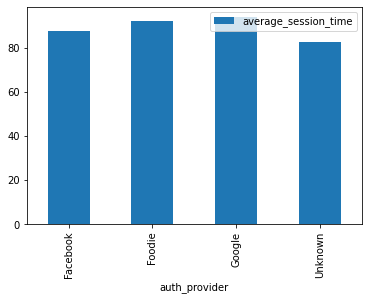

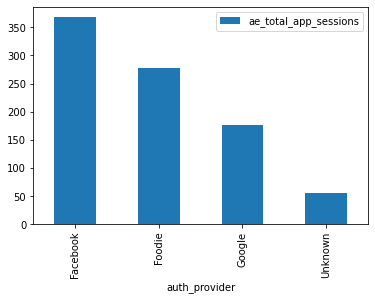

In [26]:
session_length = people_cleaned[['auth_provider', 'average_session_time']].groupby('auth_provider').mean()
num_sessions = people_cleaned[['auth_provider', 'ae_total_app_sessions']].groupby('auth_provider').mean()
session_length.plot.bar()
num_sessions.plot.bar();


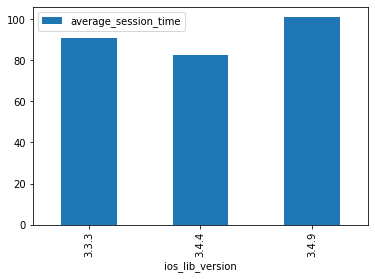

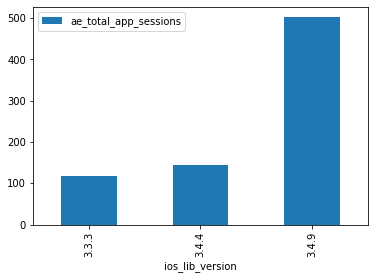

In [27]:
session_length1 = people_cleaned[['ios_lib_version', 'average_session_time']].groupby('ios_lib_version').mean()
num_sessions1 = people_cleaned[['ios_lib_version', 'ae_total_app_sessions']].groupby('ios_lib_version').mean()
session_length1.plot.bar()
num_sessions1.plot.bar();

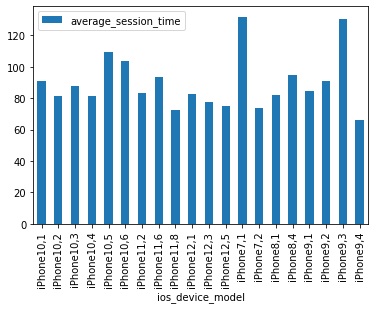

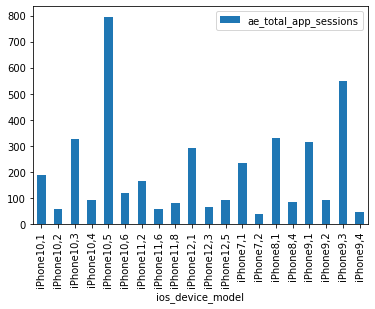

In [28]:
session_length2 = people_cleaned[['ios_device_model', 'average_session_time']].groupby('ios_device_model').mean()
num_sessions2 = people_cleaned[['ios_device_model', 'ae_total_app_sessions']].groupby('ios_device_model').mean()
session_length2.plot.bar()
num_sessions2.plot.bar();